
**The Bike sharing platforms from across the world are hotspots of all sorts of data, ranging from travel time, start and end location,weather conditions,traffic , demographics of riders, and son on.
The bike sharing dataset which is used for current data analysis, contains bike sharing details with weather information.**

The bike sharing dataset contains hour level and day level data. The day level data is considered for the current data analysis.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("../input"))



['Readme.txt', 'day.csv', 'hour.csv']


**Preprocessing**




Load the day level data

In [2]:
Bike_df=pd.read_csv("../input/day.csv")
Bike_df.shape


(731, 16)



The dataset contains 731 observations with 16 attributes. Let's check top few rows to see how the data looks.

In [3]:
Bike_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Next, we need to check what datatypes the pandas has inferred & if any of the features require data conversions.

In [4]:
Bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

The attribute **dteday** would require type conversion from **object** or **string** type to **timestamp**. Attributes like season, holiday, workingday, & so on are require type conversion from **integer** to **categorical** for proper understanding.
To make the data more understandable, clean up the attribute names.

In [5]:
#clean up attribute names
Bike_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                       'weathersit':'weather_condition',
                       'hum':'humidity',
                       'mnth':'month',
                       'cnt':'total_count',
                       'yr':'year'},inplace=True)

In [6]:
Bike_df.head(10)

,rec_id,datetime,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [7]:
#date time conversion
Bike_df['datetime']=pd.to_datetime(Bike_df.datetime)

# Categorical variables
Bike_df['season']=Bike_df.season.astype('category')
Bike_df['is_holiday']=Bike_df.is_holiday.astype('category')
Bike_df['is_workingday']=Bike_df.is_workingday.astype('category')
Bike_df['weekday']=Bike_df.weekday.astype('category')
Bike_df['weather_condition']=Bike_df.weather_condition.astype('category')
Bike_df['month']=Bike_df.month.astype('category')
Bike_df['year']=Bike_df.year.astype('category')


In [8]:
#Descriptive statistics for each column
np.round(Bike_df.describe(),2)

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


The dataset after preprocessing is ready for visual inspection

[Text(0.5, 1.0, 'Season wise montly distribution of raidership counts ')]

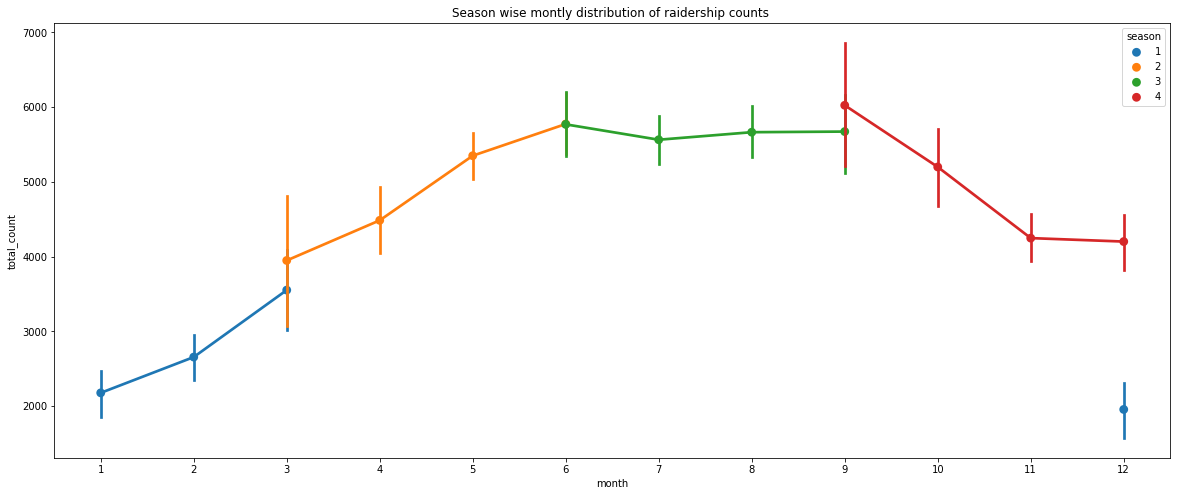

In [9]:
# Visualizing monthly raidershp counts across the seasons
fig,ax=plt.subplots(figsize=(20,8))
sn.pointplot(data=Bike_df[['month','total_count','season']],x='month',
             y='total_count',
             hue='season',ax=ax)
ax.set(title='Season wise montly distribution of raidership counts ')

**Season representations in above distribution,
> 1- Spring season,
> 2- Summer season,
> 3- Rainy season,
> 4- Winter season**

The above distribution shows the lowest raidership count for Spring season, then count increases in summer season.This count is constant throughout Rainy season.This count reaches peak at the start of winter season, then falls afterwards.

**Similarly, will see the weekday wise distribution of raidership counts.**

[Text(0.5, 1.0, 'Weekday wise monthly distribution of raidership counts')]

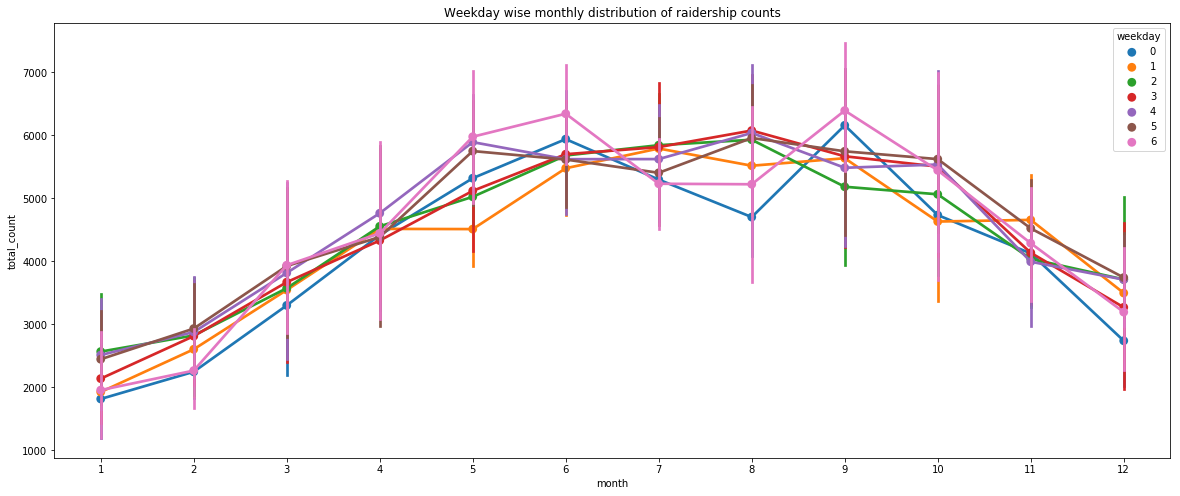

In [10]:
fig,ax=plt.subplots(figsize=(20,8))
sn.pointplot(data=Bike_df[['month','total_count','weekday']],x='month',y='total_count',
            hue='weekday',ax=ax)
ax.set(title='Weekday wise monthly distribution of raidership counts')

**Simlarly, will see the month-wise raidership distribution**

[Text(0.5, 1.0, 'Month-wise raidership distribution')]

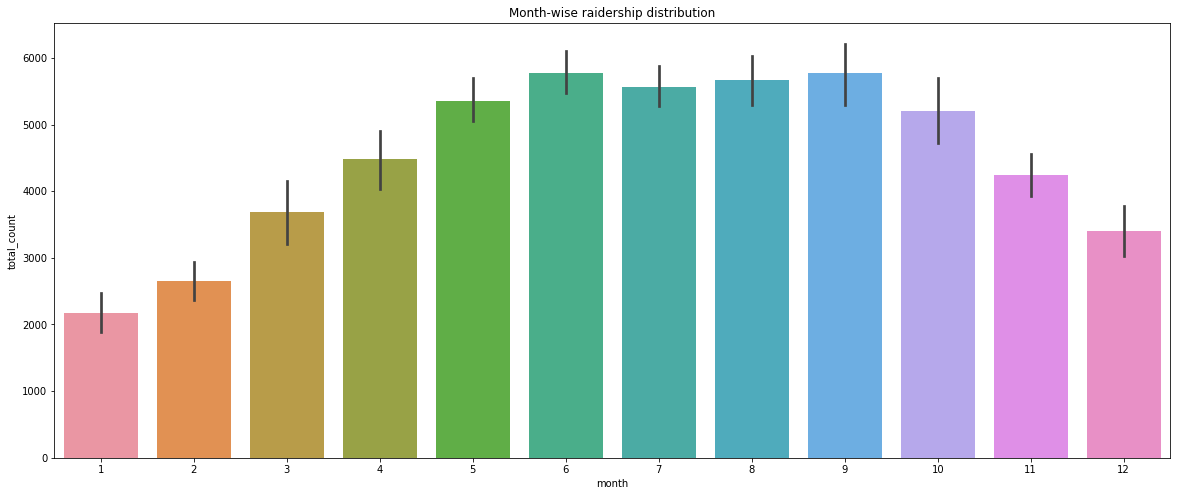

In [11]:
fig,ax=plt.subplots(figsize=(20,8))
sn.barplot(data=Bike_df[['month','total_count']],x='month',y='total_count',ax=ax)
ax.set(title='Month-wise raidership distribution')



The above distribution shows highest raidership counts for the month June-September & lowest count for January month.

**Let's look at the distribution at year level**

Our dataset contains **year** values **0** for representing **2011** and **2** for representing **2012**.

[Text(0.5, 1.0, 'Year-wise distribution of raidership counts')]

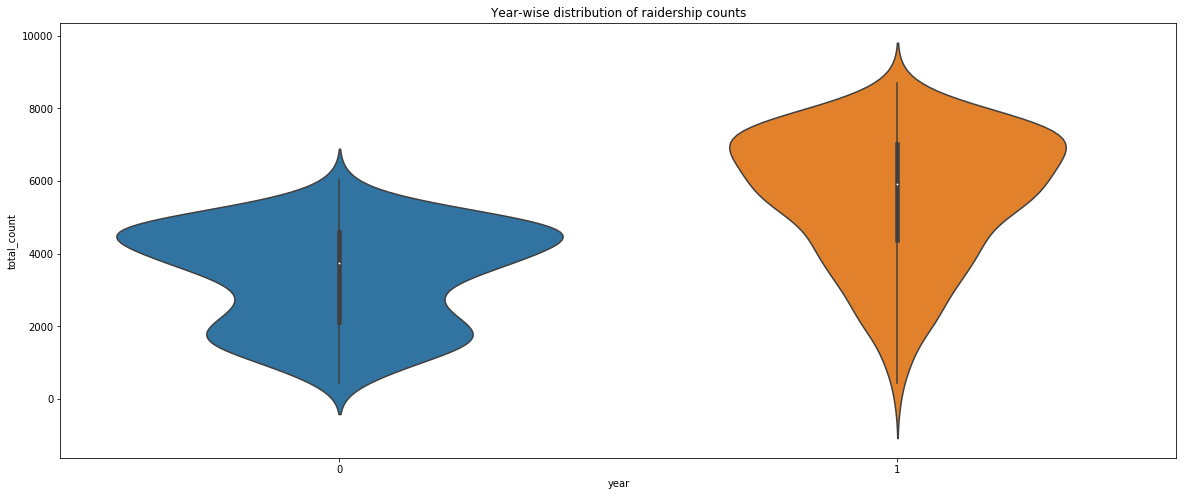

In [12]:
# Violin plot is used for Year-wise distribution
fig,ax=plt.subplots(figsize=(20,8))
sn.violinplot(data=Bike_df[['year','total_count']],x='year',y='total_count',ax=ax)
ax.set(title='Year-wise distribution of raidership counts')


In above distribution,
> year 0 - 2011 ,
> year 1 - 2012


The above distribution clearly helps us to understand the multimodal distribution in both 2011 and 2012 raidership counts.The distribution for 2012 has peaks at highest values as compared with the distribution for 2011.

Now, we check outliers in the dataset for better modeling & results.


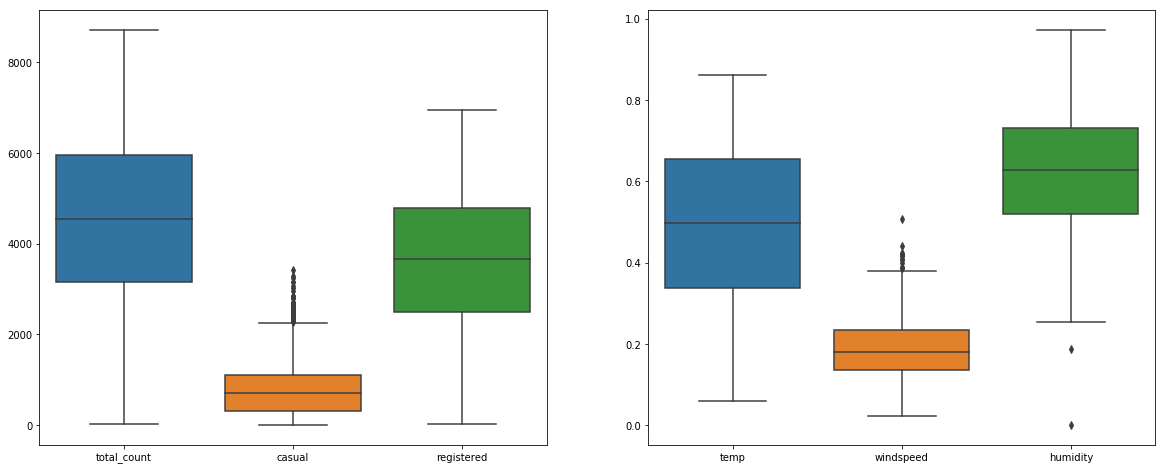

In [13]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,8))
sn.boxplot(data=Bike_df[['total_count','casual','registered']],ax=ax1)
sn.boxplot(data=Bike_df[['temp','windspeed','humidity']],ax=ax2)

In above plots, the casual, windspeed, & humidity data shows the outliers.

**Correlations**


Correlations help us to understand the relationship between different attributes of the data to build better models.

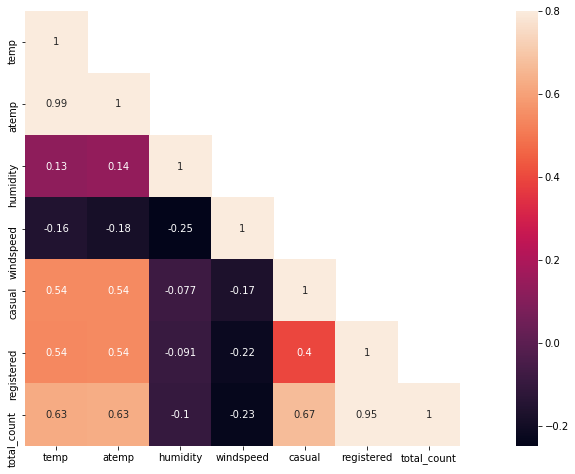

In [14]:
# Correlation matrix to find correlations between data attributes
CorrMat=Bike_df[['temp','atemp','humidity','windspeed',
                 'casual','registered','total_count']].corr()
mask=np.array(CorrMat)
mask[np.tril_indices_from(mask)]=False
#Heat map to plot the Correlation matrix
fig,ax=plt.subplots(figsize=(20,8))
sn.heatmap(CorrMat,mask=mask,
          vmax=0.8,square=True,annot=True,ax=ax)

The above plot is the the output correlation matrix (heatmap) showing values in lower triangular form
> Keyponts from plot:
*  Variables temp & atemp have strong correlation
*  Variables humidity & windspeed have slight negative correlation .i.e, independent to each other
*  Variables casual & registered have strong correlation to total_count



**Modeling**


Now, let's jump into modeling.

Split the dataset into training (70%) & testing(30%) sets to evaluate the performance of models

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Bike_df.iloc[:,0:-3],Bike_df.iloc[:,-1],
                                  test_size=0.3, random_state=42)
#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()
# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()


In [16]:
train_attributes=X_train[['season','month','year','weekday','is_holiday','is_workingday','weather_condition',
                         'humidity','temp','windspeed']]
test_attributes=X_test[['season','month','year','weekday','is_holiday','is_workingday',
                       'humidity','temp','windspeed','weather_condition']]
cat_attributes=['season','is_holiday','is_workingday','weather_condition','year']
num_attributes=['temp','windspeed','humidity','month','weekday']

In [17]:
#Transform categorical Variables
Bike_train=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',Bike_train.shape)
Bike_train.head(5)


Shape of transfomed dataframe:: (511, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,is_workingday_0,is_workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,8,5,0.415000,0.708333,0.125621,0,0,1,0,1,0,0,1,1,0,0,1,0
1,11,4,0.620417,0.321667,0.152987,0,0,0,1,1,0,0,1,0,1,0,0,1
2,11,5,0.524583,0.345000,0.171025,0,0,0,1,1,0,0,1,1,0,0,0,1
3,6,1,0.494583,0.635000,0.305350,0,1,0,0,1,0,0,1,1,0,0,1,0
4,1,1,0.400833,0.269167,0.215792,1,0,0,0,1,0,0,1,1,0,0,0,1


**Final training dataset for building models**

In [18]:
X=Bike_train
y=y_train.total_count.values

**Linear Regression model**

In [19]:
from sklearn import linear_model
lin_reg=linear_model.LinearRegression()
lr_model=lin_reg.fit(X,y)
print('R-squared score for training dataset::',np.round(lr_model.score(X,y),3))
print('Model coefficients::',np.round(lr_model.coef_,3))
print('Model intercept value::',np.round(lr_model.intercept_,3))



R-squared score for training dataset:: 0.816
Model coefficients:: [  -25.68     69.045  -946.116  5226.319 -2526.832  -960.798   233.217
   -71.469   799.05    228.88   -228.88    -78.249    78.249   791.457
   269.602 -1061.059  -991.62    991.62 ]
Model intercept value:: 2138.05


**k-fold cross validation**


In [20]:
# 3 fold cross validation (cv=3)
from sklearn.model_selection import cross_val_predict,cross_val_score
predicted=cross_val_predict(lr_model,X,y,cv=3)

Scatter plot to analyze our predictions

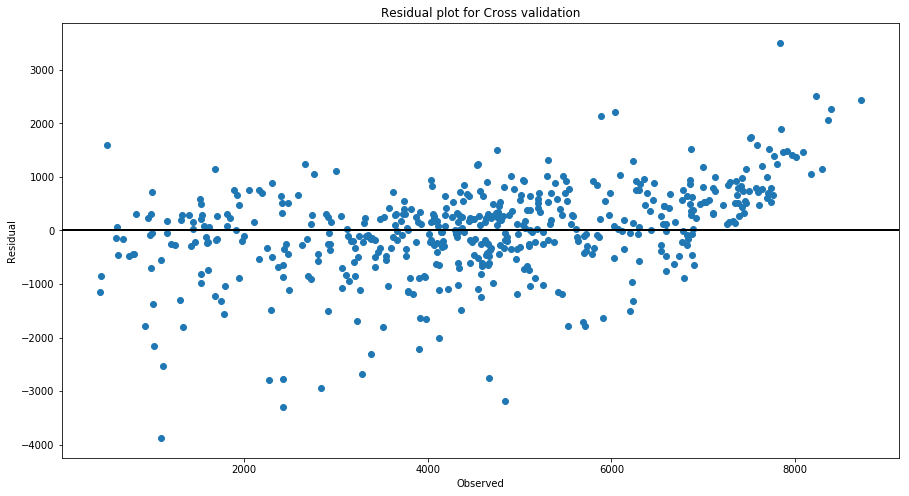

In [21]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y,y-predicted)
ax.axhline(lw=2,color='black')
ax.set_title('Residual plot for Cross validation')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

**R-squared score or Coefficient of determination to measure model performance for cross validation**

In [22]:
#R-squared
r2_score=cross_val_score(lr_model,X,y,cv=3)
R2_score=np.average(r2_score)
print('R-squared Score for cross validation dataset::',np.round(R2_score,2))

R-squared Score for cross validation dataset:: 0.8


The R-squared score is 0.80,  which means the predictor is only able to explain 80% of the variance in the target variable. 

**Model Testing**

Let's test our model on un-seen dataset ( testing dataset)

In [23]:
# Tranform categorical data to numerical data for tesing dataset
Bike_test=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe::',Bike_test.shape)
Bike_test.head(5)


Shape of transformed dataframe:: (220, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,is_workingday_0,is_workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,12,2,0.733750,0.475833,0.174129,0,0,0,1,1,0,0,1,1,0,0,0,1
1,2,4,0.437826,0.186957,0.277752,1,0,0,0,1,0,0,1,1,0,0,1,0
2,10,5,0.585833,0.330833,0.229479,0,0,0,1,1,0,0,1,0,1,0,1,0
3,4,0,0.676250,0.425833,0.172267,0,1,0,0,1,0,1,0,0,1,0,0,1
4,9,2,0.570000,0.550000,0.236321,0,0,0,1,1,0,0,1,1,0,0,0,1


Now, will predict our model performance for testing dataset

In [24]:
from sklearn.metrics import r2_score
# Test dataset for model testing
X_t=Bike_test
y_t=y_test.total_count.values
#predict the model performance
y_pred=lr_model.predict(X_t)
residuals=y_t-y_pred
#predicted score
print('R-squared score for testing dataset::',np.round(r2_score(y_t,y_pred),3))


R-squared score for testing dataset:: 0.846


Residual plot for testing dataset


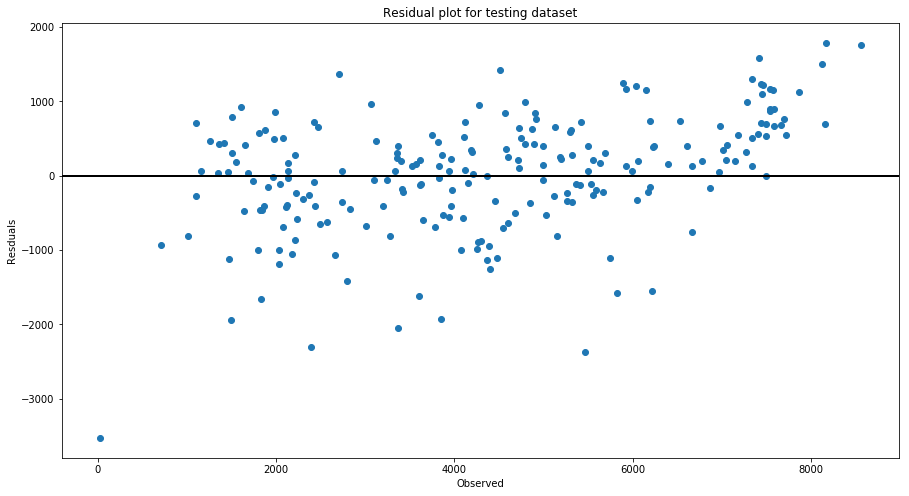

In [25]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_t, residuals)
ax.axhline(lw=2,color='black')
ax.set_title('Residual plot for testing dataset')
ax.set_xlabel('Observed')
ax.set_ylabel('Resduals')
plt.show()

Although the linear regression model is performing equally on both training & testing datasets, the model is unable to model the data to generate decent results due to non-linearty & other factors.

**Decision tree based Regression**

Train dataset for Decision tress based regression

In [26]:
X_d=Bike_train
y_d=y_train.total_count.values
X_d.shape,y_d.shape

((511, 18), (511,))

In [27]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=5,min_samples_split=8,max_leaf_nodes=40,min_samples_leaf=3)
dtr.fit(X_d,y_d)


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=40, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [28]:
print('R-squared score::',np.round(dtr.score(X_d,y_d),2))

R-squared score:: 0.87


Plot the learnt model

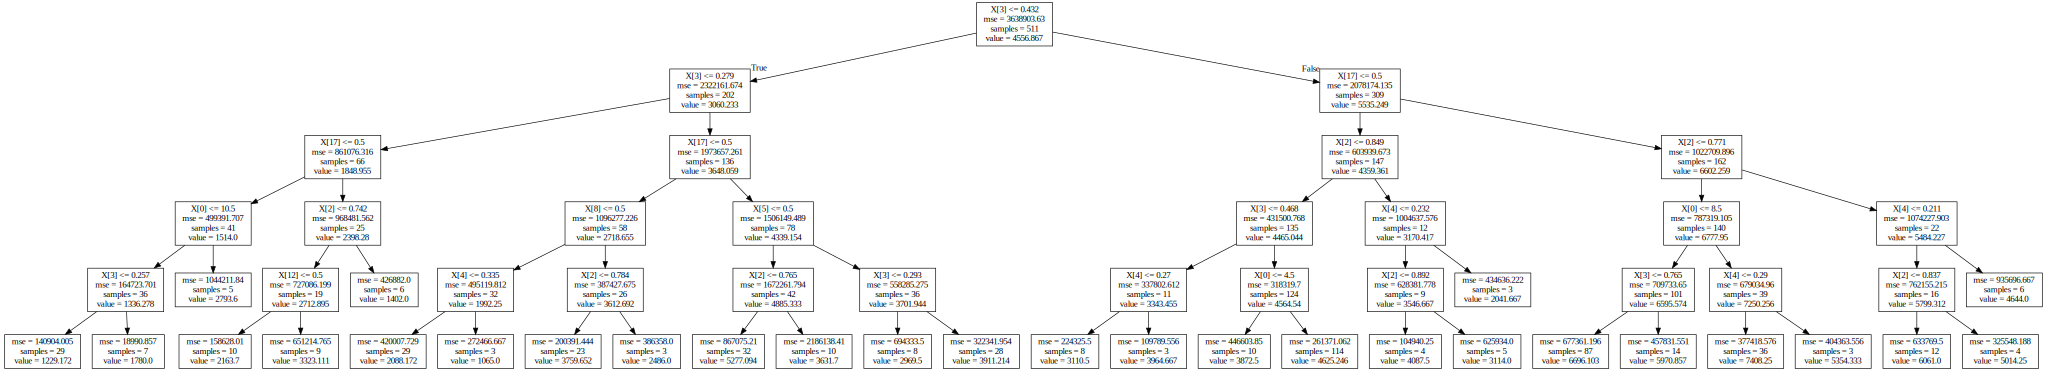

In [29]:
from sklearn import tree
import pydot
import graphviz
dtr_data=tree.export_graphviz(dtr,out_file=None)
dtr_graph=graphviz.Source(dtr_data)
dtr_graph

Model performance on test dataset

In [30]:
from sklearn.metrics import r2_score
# Test dataset for model testing
X_dt=Bike_test
y_dt=y_test.total_count.values
#predict the model performance
y_dpred=dtr.predict(X_dt)
residuals=y_dt-y_dpred
#predicted score
print('R-squared score for testing dataset::',np.round(r2_score(y_dt,y_dpred),3))

R-squared score for testing dataset:: 0.839


Residual plot for test data

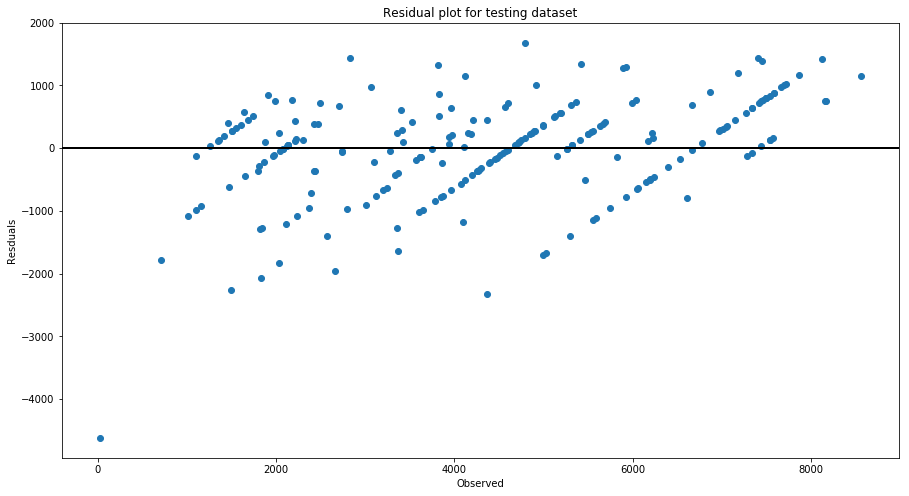

In [31]:
residuals=y_dt-y_dpred
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_dt, residuals)
ax.axhline(lw=2,color='black')
ax.set_title('Residual plot for testing dataset')
ax.set_xlabel('Observed')
ax.set_ylabel('Resduals')
plt.show()

From the R-squared score, it is evedent that,the Decision tree based regression model permance is comparable with linear regression model.

**Random Forest based Regression**

 Train & Test Datasets for Random Forest based regression

In [32]:
# Train dataset
X_rf_tr=Bike_train
y_rf_tr=y_train.total_count.values
X_rf_tr.shape,y_rf_tr.shape

((511, 18), (511,))

In [33]:
#Test dataset
X_rf_ts=Bike_test
y_rf_ts=y_test.total_count.values
X_rf_ts.shape,y_rf_ts.shape

((220, 18), (220,))

In [34]:
# import the model
from sklearn.ensemble import RandomForestRegressor
# Assign no. of decision trees = 1000
rf=RandomForestRegressor(n_estimators=1000, random_state=42)
# Train the model on the training data
rf.fit(X_rf_tr,y_rf_tr)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [35]:
# R-squared score for trained data
print('R-squared score for trained dataset::',np.round(rf.score(X_rf_tr,y_rf_tr),3))

R-squared score for trained dataset:: 0.981


Making predictions on the test dataset


In [36]:
#Use the forest's predict method
y_pred_rf=rf.predict(X_rf_ts)

# R-squared score for predictions
print('R-squared score for predictions::',np.round(r2_score(y_rf_ts,y_pred_rf),3))

R-squared score for predictions:: 0.897


**Model Evaluation**

Evaluating the models to select best model for prediction

In [37]:
#Dataframe for models
Model = ['Linear Regression','Decision tree','Random Forest']
df1=pd.DataFrame(Model,columns=['Model'])
R2_score = [0.846,0.84,0.897]
df2=pd.DataFrame(R2_score,columns=['R2_score'])
Model_df=pd.merge(df1,df2,left_index=True,right_index=True)
print('Model evaluation on test data:\n',Model_df)

Model evaluation on test data:
                Model  R2_score
0  Linear Regression     0.846
1      Decision tree     0.840
2      Random Forest     0.897


From the R2_score, it is concluded that, the Random Forest based regression has higest score among all models. Hence, the Random Forest based Regression is best for predicting the Bike sharing demand.